In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import product
#%matplotlib inline

In [6]:
field_size  = 30
alpha = 0.2
ite=10000
nei = [-1,0,1]
save_ite_every = 1000
anime_ite_every = 100

In [7]:
#init
state = np.random.rand(field_size,field_size,3)
state_rec = []
ims = []
fig = plt.figure(figsize=[5,5])
#main loop
for _ in range(ite):
    if np.mod(_,anime_ite_every)==0:
        #plot
        img = plt.imshow(state,animated=True)
        plt.axis('off')
        ims.append([img])
    if np.mod(_,save_ite_every)==0:
        state_rec.append(np.copy(state))
        print(_)
    #sampling color
    r = np.random.rand(3)
    #calculate distance
    d = np.sum((state - r)**2,axis=2)
    #find most similar position
    ind = np.where(d == np.min(d))
    
    #update
    for h,w in product(nei,nei):
        try:
            state[ind[0][0] + h, ind[1][0] + w] = (1-alpha) * state[ind[0][0] +h, ind[1][0] + w] + alpha * r
        except:
            #avoid to go out of field
            pass
        
ani = animation.ArtistAnimation(fig, ims)
ani.save('som_animation.gif', writer="imagemagick")
plt.close()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


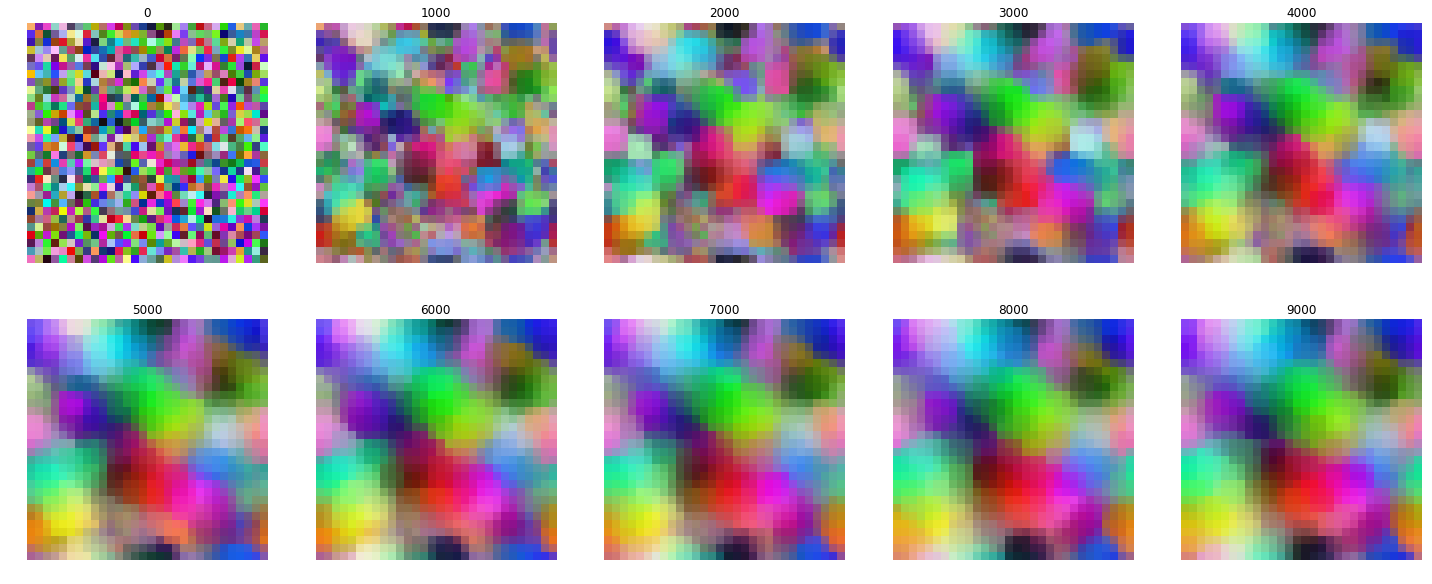

In [8]:
plt.figure(figsize=[25,10])
for k in range(10):
    plt.subplot(2,5,k+1)
    plt.imshow(state_rec[k])
    plt.axis('off')
    plt.title(save_ite_every*k)
plt.savefig('som.png')
plt.show()